# ESE546  - Recitation - Sep 4th

### Outline

* Google Colab (Setup, ngrok, Gdrive)
* Crash course on Python
    * Basic constructs
    * Numpy
    * Matplotlib
* Tools (pycharm, vscode, ipdb, wandb, scikit-learn)



# Google Colab

Google colab is a free service that gives you access to jupyter notebooks with pre-installed packages. 
Access colab at: https://colab.research.google.com/. 



### Installing software

Every session of colab starts with the same base configuration 

* Any bash command can be executed by adding a ``!`` before the command. Add a custom set of bash commands at the top of the notebook to setup the Colab instance.

``` !apt install zip tmux vim```

* Although most required python packages are already installed, you can install additional ones using the command

```pip install torchvision```


In [ ]:
!apt install tmux vim zsh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tmux is already the newest version (2.6-3ubuntu0.2).
vim is already the newest version (2:8.0.1453-1ubuntu1.3).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  zsh-common
Suggested packages:
  zsh-doc
The following NEW packages will be installed:
  zsh zsh-common
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,066 kB of archives.
After this operation, 15.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 zsh-common all 5.4.2-3ubuntu3.1 [3,376 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 zsh amd64 5.4.2-3ubuntu3.1 [690 kB]
Fetched 4,066 kB in 1s (4,045 kB/s)
Selecting previously unselected package zsh-common.
(Reading database ... 146444 files

Colab has quite a few pre-installed packages

In [ ]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.8.1          
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.2.10         
astor                         0.8.1          
astropy                       4.0.1.post1    
astunparse                    1.6.3          
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.1.0         
audioread                     2.1.8          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.1.5          
blis                          0.4.1          
bokeh                         2.1.

In [ ]:
pip install wandb

     |████████████████████████████████| 1.4MB 2.9MB/s 
     |████████████████████████████████| 122kB 18.3MB/s 
     |████████████████████████████████| 102kB 6.1MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 163kB 18.9MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=a326149d68d20b7d9c7b8312ed4e334a6231e4d1f12367ef68dbd3f350587f0c
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=e9ee426a90953467995d535ded489a427973a5ff2ebd5115c9e2a88f84117efc
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=5509

In [ ]:
!bash

bash: cannot set terminal process group (102): Inappropriate ioctl for device
bash: no job control in this shell
]0;root@35a7c9204441: /contentroot@35a7c9204441:/content# ls
sample_data
]0;root@35a7c9204441: /contentroot@35a7c9204441:/content# pwd
/content
]0;root@35a7c9204441: /contentroot@35a7c9204441:/content# exit
exit


### Workflow

* Shortcuts: Customize the collection of shortcuts and refer to the Help section. Some useful shortcuts to know are:
    * Help          - ``Ctrl+M H``
    * Run           - ``Shift+Enter``, ``Ctrl+Enter``, ``Alt+Enter``
    * Delete Cell   - ``Ctrl+M D``
    * Scratch       - ``Ctrl+Alt+N``
* Use GPU: Colab does not start with a GPU by default and the same needs to be configured. Only use the GPU when necessary in order to get favorable allocations of GPUs from the Colab backend.
     * Runtime -> Change Runtime Type -> GPU
     * Check if a GPU is attached, using the command ``!nvidia-smi``
* Connect to Gdrive: In order to save checkpoints, models and data, connect to you Gdrive account to use as a persistent storage. 

In [ ]:
nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('gdrive')

Colab disconnects if the browser tab is inactive.
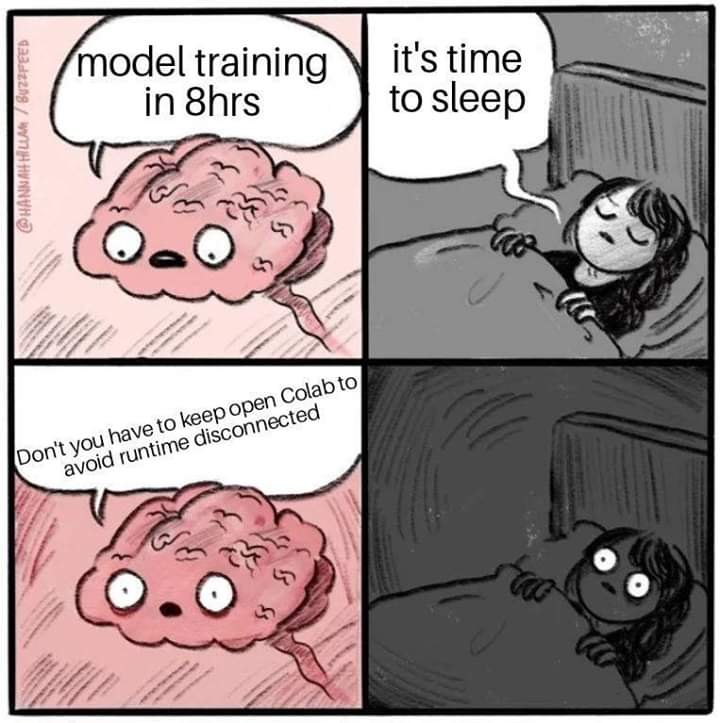


 A workaround is execute the following code in the browser console (See [reference](https://stackoverflow.com/questions/57113226/how-to-prevent-google-colab-from-disconnecting) )
```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
```

### Ngrok

Any colab instance has an underlying VM which one can access through the *SSH* protocol. ( [Reference](https://imadelhanafi.com/posts/google_colal_server/)). One has to setup an Ngrok tunnel, that tunnels all traffic through a secure Ngrok server. Create an Ngrok account and use the authkey in order to authenticate the tunnel

In [9]:
#Generate a random root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(30))


#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null

#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config

print("username: root")
print("password: ", password)

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

username: root
password:  KZSmMnxAY5mksaD6L08OLWXY3BqXic


In [5]:
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip

In [ ]:
!./ngrok authtoken <auth_token_here>

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [11]:
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok tcp 22 &')

··········


# Dev Tools

* Editor
    * VS-Code
        * Has great integration with Pytorch. Debugging is great too
    * Pycharm
    * Sublime, Atom, Vim, Emacs
* Ipdb and Debugging
    * Debugger is a very useful tool for identifying failure modes and the cause for exceptions.
* Wandb 
    * If you want to store accuracy and loss curves alongside the code in a centralized manner, consider using [wandb](https://www.wandb.com/).
    * Free account gives you access to unlimited number of projects and 100GB storage in total. 
    * Easy to keep track of models trained on a combination of GPU, local machine and AWS cluster on different hyper-parameter settings.

* Scikit-learn:
    * Dimensionality Reduction
    * Data processing/Sampling
    * Adding Boosting/Bagging to NNs

In [ ]:
import numpy as np
import wandb
import time

wandb.init(project="python_recitation")
# Set hyper parameters
wandb.config.month = "Sep"

for i in range(10):
    time.sleep(5)
    wandb.log({"random number": np.random.uniform(0, 1, 1)})

# A Tutorial on Python
Basics of python adapted from [CS228 Python tutorial](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) by Volodymyr Kuleshov and Isaac Caswell.

### Why Python?
* Libraries for Scientific Computing (NumPy, SciPy, Matplotlib)
* Most Deep Learning frameworks are in Python (Tensorflow, Pytorch, Caffe)
* Large and active community

We will follow Python 3.x. Behaviour can slightly vary for Python 2.7

### Data Types
``int`` and ``float`` are similar to most other languages

In [ ]:
x = 3
print(x)   # Adds new line
print("The type of Variable 'x' is: %s" % type(x))

3
The type of Variable 'x' is: <class 'int'>


Operations work like you would expect them to

In [ ]:
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation
print(x / 2)   # Division
print(x % 2)   # Remainder 
print(x // 2)  # Integral quotient

4
2
6
9
1.5
1
1


``float`` operates similarly

In [ ]:
x = 2.5
print(type(x)) # No print
type(x)

<class 'float'>


float

``bool`` used for boolean indicators

In [ ]:
t, f = True, False

print(t and f)           # Logical AND;
print(t or f)            # Logical OR;
print(not t)             # Logical NOT;
print(t != f)            # Logical XOR;
print(t + f)             # Integer
print(t * f)             #
print(t and not t or t)  # Use brackets!

False
True
False
True
1
0
True


``str`` for handling strings. Lots of tricks related ``str`` but may not be too relevant for this course

In [ ]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello)
print(len(hello))
print(hello + " " + world)

hello
5
hello world


Python also has some useful constants

In [ ]:
infinity = float('inf')
print(infinity > 3)
print(infinity < 3)
print(infinity == 2)
print(infinity + 1)

True
False
False
inf


In [ ]:
none_val = None

if none_val is None:
    print("Clause is None")

Clause is None


### Containers
Store a collection of related objects
* Lists
* Tuples
* Sets
* Dictionaries

In [ ]:
xs = [3, 1, 2, 4, 7, 8]   # Create a list
print(xs)
print(xs[2])
print(xs[-2])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2, 4, 7, 8]
2
7


Slicing indices is key to accessing element subsets

In [ ]:
print(xs)
print(xs[2:4])      # Get a slice from index 2 to 4 (exclusive)
print(xs[2:])       # Get a slice from index 2 to the end
print(xs[:2])       # Get a slice from the start to index 2 (exclusive)
print(xs[:])        # Get a slice of the whole list
print(xs[3:-2])     # Slice indices can be negative
xs[2:4] = [8, 9]  # Assign a new sublist to a slice
print(xs)

[3, 1, 2, 4, 7, 8]
[2, 4]
[2, 4, 7, 8]
[3, 1]
[3, 1, 2, 4, 7, 8]
[4]
[3, 1, 8, 9, 7, 8]


In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo', 9, 7, 8]


In [ ]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

[3, 1, 'foo', 9, 7, 8, 'bar']


In [ ]:
x = xs.pop()     # Remove and return the last element of the list
print(x)
print(xs) 

bar
[3, 1, 'foo', 9, 7, 8]


What is the output of the following?
```
x = [1, 2, 3, 4, 5]
x_copy = x
x_copy2 = x
x_copy = x_copy.append(10)
x_copy2 = xcopy2 + [10]

y = "hello"
y_copy = y
y_copy = y_copy + " world"

print(x)
print(x_copy)
print(x_copy2)
print(y)
print(y_copy)
```

This is tricky, ``x_copy``, doesn't store a copy of ``x`` but is simply a different name for the same object. On the other hand, ``x_copy2`` is a new object. This isn't an issue with ``str`` objects.

In [ ]:
x = [1, 2, 3, 4, 5]
x_copy = x
x_copy2 = x
x_copy.append(10)
x_copy2 = x_copy2 + [10]

y = "hello"
y_copy = y
y_copy = y_copy + " world"

print(x)
print(x_copy)
print(x_copy2)
print(y)
print(y_copy)

[1, 2, 3, 4, 5, 10]
[1, 2, 3, 4, 5, 10]
[1, 2, 3, 4, 5, 10, 10]
hello
hello world


Consider using deepcopy/copy instead

In [ ]:
from copy import deepcopy 

x = [1, 2, 3, 4, 5]
x_copy = deepcopy(x)
x_copy.append(10)
print(x)
print(x_copy)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 10]


### Tuples
The previous example highlights the difference between mutable and immutable objects. Tuples are similar to lists except that they cannot be modified in-place. A modification will result in the creation of a new tuple.


In [ ]:
x = (1, 2, 4, 5)
y = [1, 2, 4, 3]
print(x, type(x))
print(y, type(y))

print(x[2], y[2])   # Can access elements in set/tuple
y[2] += 1
print(y)
# x[2] += 1          # Cannot modify element in a tuple (immutable)

(1, 2, 4, 5) <class 'tuple'>
[1, 2, 4, 3] <class 'list'>
4 4
[1, 2, 5, 3]


a ``set`` emulates the properties of a mathematical set

In [ ]:
animals = {'cat', 'mouse', 'pigeon'}
print(animals)
animals = set(['cat', 'mouse', 'pigeon'])
print(animals)

animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))    

{'mouse', 'cat', 'pigeon'}
{'mouse', 'cat', 'pigeon'}
3
2


A dictionary (``dict``) is used to represent mappings from an immutable objects, to any object

In [ ]:
accuracy = {
    "SVM": 80,
    ("Neural net", "v1"): 93
}
accuracy["Random"] = 50

# Access keys and values/items
print(accuracy.keys())
print(accuracy.items())

print(accuracy)

dict_keys(['SVM', ('Neural net', 1), 'Random'])
dict_items([('SVM', 80), (('Neural net', 1), 93), ('Random', 50)])
{'SVM': 80, ('Neural net', 1): 93, 'Random': 50}


### Loops

``for``, ``while`` and ``do while`` based loops exist in python. The ``for`` is the best choice for most situations due to its operability with various objects.


In [ ]:
xs = [3, 4, 8, 9]
for x in xs:
    print(x)

3
4
8
9


Works on other objects like sets/dictionaries. However, the iteration sequence cannot be relied upon

In [ ]:
for a in animals:
    print(a + " is in the set")

mouse is in the set
pigeon is in the set


In [ ]:
num_map = {'a':1, 'c':3, 'z':26, 'e':5}  # Output is not in same ordered
for key in num_map:
    print(key, num_map[key])
    
# If you want to maintain order, consider using OrderedDict

a 1
c 3
z 26
e 5


``range`` and ``enumerate`` are useful in-built functions that pair well with loops

In [ ]:
for idx, x in enumerate(xs):
    print(idx, x)

0 3
1 4
2 8
3 9


In [ ]:
for i in range(2, 11, 2):
    print(i)

2
4
6
8
10


An alternate way to execute:
```
xs = [2, 3, 6, 8]
for i in range(len(xs)):
    xs[i] = xs[i] ** 2
```

In [ ]:
xs = [x**2 for x in xs]
print(xs)

[9, 16, 64, 81]


### Functions

Helps break down code into modules. Easier to test correctness of various functions individually. Also improves readability and re-usability of code 

In [ ]:
# Optional argument witha default
def sign(x, silent=True):
    if x > 0:
        retval = 'positive'
    elif x < 0:
        retval = 'negative'
    else:
        retval = 'zero'
    
    if not silent:
        print(retval)
    return retval

answer1 = sign(1)
answer2 = sign(-1, silent=False)

print(answer1, answer2)

negative
positive negative


Functions have complicated relationships with global variables. There are a lot of complexities to functions like nested functions, persistent variables, etc..

In [ ]:
# 1) Variables have contexts, prefix variable unafffected by variable of same name inside function
prefix = "global:"


# 2) Kwargs can accept a variable number of arguments
def printargs(y="test", **kwargs):
    prefix = "function:"
    print(prefix, "y=" + y)
    
    for k in kwargs:
        print(prefix, k + "=" + str(kwargs[k]))

print(prefix, "Executing functions")    
printargs(random_seed="13", cv=5)
print(prefix, "---------------")
printargs(y="train", random_seed="5")
print(prefix, "Finished executing functions")

global: Executing functions
function: y=test
function: random_seed=13
function: cv=5
global: ---------------
function: y=train
function: random_seed=5
global: Finished executing functions


### Classes
Helps us organize a collection of related functions.

In [ ]:
class Greeter:
    
    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self):
        print('Hello From This Side , %s' % self.name)
            
    @staticmethod
    def question():
        print("How are you doing?")
    
    
g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "'Hello From This Side , Fred"
g.question()

Hello From This Side , Fred
How are you doing?


In [ ]:
class DerivedGreeter(Greeter):
    # Instance method overrides that of base class.
    def greet(self):
        print('Hello From The Other Side , %s' % self.name)

    
g = DerivedGreeter('Fred')  # Construct an instance of the Greeter class
g.greet()                   # Call an instance method; prints "'Hello From The Other Side , Fred"
g.question()                # the question() function is also accessible

Hello From The Other Side , Fred
How are you doing?


## Numpy
Popular library for scientific computing that handles multi-dimensional objects. Most of the code is written in C++/C and is hence highly performant. Numpy arrays are a collection of homogenous objects (generally floats of varying precision). Can be modified using a variety of numpy functions

In [ ]:
import numpy as np

x = np.array([3, 2, 1, 4, 2, 3])
print(type(x))

print(np.sort(x))
print(np.argsort(x))
print(np.unique(x))
print(np.sqrt(x))
print(np.min(x), np.max(x), np.mean(x), np.std(x))

<class 'numpy.ndarray'>
[1 2 2 3 3 4]
[2 1 4 0 5 3]
[1 2 3 4]
[1.73205081 1.41421356 1.         2.         1.41421356 1.73205081]
1 4 2.5 0.9574271077563381


The Numpy philosophy involves simultaneously operating on a group of elements as opposed to using for loops. Manipulating all rows or columns is a common in numpy and is done using the ``axis`` argument.

In [ ]:
x = np.reshape(x, (2, 3))
print("Matrix", x)
print("Mat mul.", x @ x.T)
print("Elemwise mul.", x * x)

print("Min in each axis", np.min(x, axis=(0,)))
print("Min in each axis", np.min(x, axis=(0,1)))

Matrix [[3 2 1]
 [4 2 3]]
Mat mul. [[14 19]
 [19 29]]
Elemwise mul. [[ 9  4  1]
 [16  4  9]]
Min in each axis [3 2 1]
Min in each axis 1


In [ ]:
print(np.zeros((2,2)))

[[0. 0.]
 [0. 0.]]


Numpy also has a random number generator

In [ ]:
print(np.random.randn(2, 2))

[[ 1.91040953  0.1292269 ]
 [-0.99174988 -2.59161813]]


The Documentation is your friend.

In [ ]:
?np.random.randn

One can concatenate, reshape and merge numpy arrays in various ways

In [ ]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
print(np.concatenate([x, y]))

[1 2 3 4 5 6 7 8]


In [ ]:
print(x.shape)
print(x[np.newaxis, :].shape)

print(np.concatenate([ x[np.newaxis,:], y[np.newaxis, :]], axis=0))

(4,)
(1, 4)
[[1 2 3 4]
 [5 6 7 8]]


Indexing and slicing are useful operations that work similar to lists. 

In [ ]:
# Indexing
x = np.random.randn(2, 2)
print(x)
print(x > 2)
print(x[x > 2])
print(np.where(x > 2))

[[ 2.03986829 -1.50273902]
 [ 0.15573528  0.0391188 ]]
[[ True False]
 [False False]]
[2.03986829]
(array([0]), array([0]))


In [ ]:
# Slicing
x = np.random.randn(3, 3)
print(x)
print(x[0:2, 0:2])

[[-0.54880483 -0.21519764 -1.21458835]
 [-0.30905259  2.44589833 -0.245343  ]
 [ 0.47641028 -0.4797279  -1.2069618 ]]
[[-0.54880483 -0.21519764]
 [-0.30905259  2.44589833]]



Broadcasting is perhaps the most important concept to understand in numpy. The core idea is that if certain dimensions are missing for an operation, these extra dimensions are hallucinated by replicating the numpy array along those dimensions

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

In [ ]:
v_replica = np.tile(v, (4, 1))
y  = x + v_replica
print(v_replica)
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [ ]:
# The same operation is simulated in broadcasting
y = x + v  
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [ ]:
# The principle applies when a dimensions of x and y dont match on multiple axes
x = np.array([[1, 2, 3]])
y = np.array([[2], [3], [5]])
print(x.shape, y.shape)
print(x + y)

(1, 3) (3, 1)
[[3 4 5]
 [4 5 6]
 [6 7 8]]


## Matplotlib

Matplotlib is a feature rich plotting library for python.
There are other neat plotting tools like Seaborn/Plotnine which can plot complex plots in fewer lines of code.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Run in jupyter notebooks to display plots below cells
%matplotlib inline              

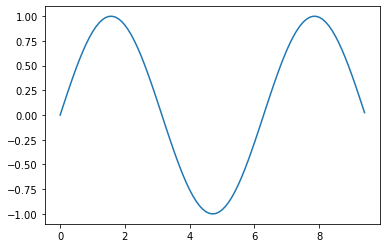

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

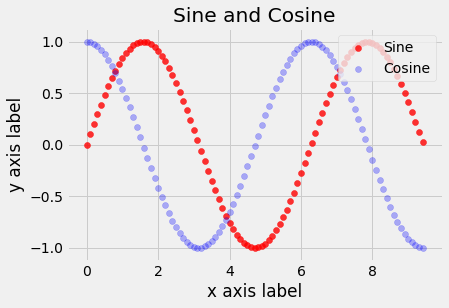

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.style.use("fivethirtyeight")
plt.scatter(x, y_sin, c='r', alpha=0.8)
plt.scatter(x, y_cos, c='b', alpha=0.3)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'], loc='upper right')

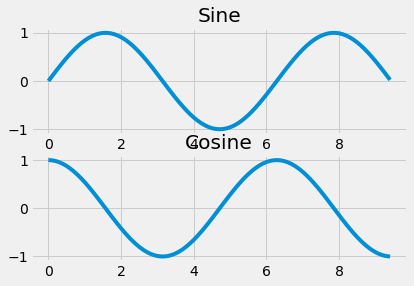

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()